In [274]:
import pkg_resources
import scipy
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
import os
print(os.getcwd())

C:\Users\bryan\Desktop\DSAI


In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

dec= pd.read_csv('train_dec2021_clean.csv')
jan = pd.read_csv('train_jan2022_clean.csv')
feb = pd.read_csv('train_feb2022_clean.csv')
mar = pd.read_csv('train_mar2022_clean.csv')

trains = pd.concat([dec,jan,feb,mar])
trains.drop(columns = ['period'], inplace = True)
trains["station_code"].head()

0    NS10
1    NS10
2    NS10
3    NS10
4    NS10
Name: station_code, dtype: object

In [4]:
# Sum of hourly entry over 3 mths
grouped_df = trains.groupby(["hour","station_code","day_type"])
grouped_and_summed = grouped_df[['tap_in_vol','tap_out_vol']].mean()
grouped_and_summed = grouped_and_summed.reset_index()
train =  trains.groupby(["hour","station_code","day_type"])

del(trains)

inoutMean = train.agg({"tap_in_vol": 'mean', "tap_out_vol": 'mean'})

train = train.nth(n=0)

trains = pd.merge(train, inoutMean, on=["hour","station_code","day_type"])
trains.drop(columns=['tap_in_vol_x', 'tap_out_vol_x'], inplace = True)

trains = trains[(trains[["SW","SE","BP","PW","PE"]].isnull().all(axis = 1))
                | (trains['code']=="NE16") | (trains['code']=="NS4")
                | (trains['code']=="DT1") | (trains['code']=="NE17")
                | (trains['code']=="DT1/BP6") | (trains['code']=="BP6")
               ]

trains.sort_values(by=['station_code', 'hour', 'day_type'], inplace = True)
trains.reset_index(inplace=True)
trains.head()

,hour,station_code,day_type,code,code2,code3,interchange,NS,SW,CC,EW,NE,BP,CE,DT,PW,TE,PE,CG,SE,name,tap_in_vol_y,tap_out_vol_y
0,5,BP6/DT1,weekday,BP6,DT1,NaN,True,NaN,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,Bukit Panjang,9082.00,8842.75
1,5,BP6/DT1,weekend,BP6,DT1,NaN,True,NaN,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,Bukit Panjang,1680.75,1452.50
2,6,BP6/DT1,weekday,BP6,DT1,NaN,True,NaN,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,Bukit Panjang,37389.00,21041.75
3,6,BP6/DT1,weekend,BP6,DT1,NaN,True,NaN,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,Bukit Panjang,5584.75,2855.50
4,7,BP6/DT1,weekday,BP6,DT1,NaN,True,NaN,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,Bukit Panjang,67522.00,37424.25


In [5]:
#Total Tap In and tap out
grpDF = trains.groupby(["station_code", 'day_type'])
grpSum = grpDF[['tap_in_vol_y','tap_out_vol_y']].sum()
grpSum = grpSum.reset_index()
grpSum = grpSum.rename(columns={"tap_in_vol_y": "totalTapIn", "tap_out_vol_y": "totalTapOut"})
trains = pd.merge(trains, grpSum, on=['station_code', 'day_type'], how='left')
trains.rename(columns = {'tap_in_vol_y': 'tap_in_vol', 'tap_out_vol_y': 'tap_out_vol'}, inplace=True)
trains.head()

,hour,station_code,day_type,code,code2,code3,interchange,NS,SW,CC,EW,NE,BP,CE,DT,PW,TE,PE,CG,SE,name,tap_in_vol,tap_out_vol,totalTapIn,totalTapOut
0,5,BP6/DT1,weekday,BP6,DT1,NaN,True,NaN,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,Bukit Panjang,9082.00,8842.75,503763.25,540350.25
1,5,BP6/DT1,weekend,BP6,DT1,NaN,True,NaN,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,Bukit Panjang,1680.75,1452.50,178252.00,185204.75
2,6,BP6/DT1,weekday,BP6,DT1,NaN,True,NaN,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,Bukit Panjang,37389.00,21041.75,503763.25,540350.25
3,6,BP6/DT1,weekend,BP6,DT1,NaN,True,NaN,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,Bukit Panjang,5584.75,2855.50,178252.00,185204.75
4,7,BP6/DT1,weekday,BP6,DT1,NaN,True,NaN,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,Bukit Panjang,67522.00,37424.25,503763.25,540350.25


In [6]:
trains['percentIn'] = trains['tap_in_vol'] / trains['totalTapIn']
trains['percentOut'] = trains['tap_out_vol']/ trains['totalTapOut']
trains = trains.sort_values(by=['station_code', 'hour'])
trains.head()

,hour,station_code,day_type,code,code2,code3,interchange,NS,SW,CC,EW,NE,BP,CE,DT,PW,TE,PE,CG,SE,name,tap_in_vol,tap_out_vol,totalTapIn,totalTapOut,percentIn,percentOut
0,5,BP6/DT1,weekday,BP6,DT1,NaN,True,NaN,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,Bukit Panjang,9082.00,8842.75,503763.25,540350.25,0.018028,0.016365
1,5,BP6/DT1,weekend,BP6,DT1,NaN,True,NaN,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,Bukit Panjang,1680.75,1452.50,178252.00,185204.75,0.009429,0.007843
2,6,BP6/DT1,weekday,BP6,DT1,NaN,True,NaN,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,Bukit Panjang,37389.00,21041.75,503763.25,540350.25,0.074219,0.038941
3,6,BP6/DT1,weekend,BP6,DT1,NaN,True,NaN,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,Bukit Panjang,5584.75,2855.50,178252.00,185204.75,0.031331,0.015418
4,7,BP6/DT1,weekday,BP6,DT1,NaN,True,NaN,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,Bukit Panjang,67522.00,37424.25,503763.25,540350.25,0.134035,0.069259


<AxesSubplot:xlabel='hour'>

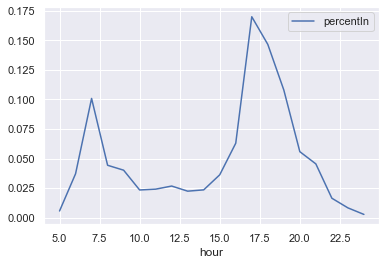

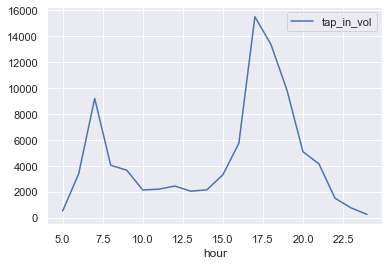

In [7]:
trains.loc[(trains['name']=="Kranji") & (trains['day_type']=="weekday")].plot.line(x = 'hour', y = 'percentIn')
trains.loc[(trains['name']=="Kranji") & (trains['day_type']=="weekday")].plot.line(x = 'hour', y = 'tap_in_vol')

In [8]:
from tslearn.metrics import dtw

x = trains.loc[(trains['name']=="Kranji") & (trains['day_type']=="weekday")]['percentIn'].reset_index()
y = trains.loc[(trains['name']=="Tuas Link") & (trains['day_type']=="weekday")]['percentIn'].reset_index()
dtw_score = dtw(x, y)

In [9]:
print(dtw_score)

7513.18840464209


In [10]:
data = trains.groupby(['station_code', 'day_type'])

n = 1;
for name, group in data:
    if n ==1:
        df = pd.pivot_table(group, index=['station_code', 'day_type'], columns='hour', values='percentIn')
        dfOut = pd.pivot_table(group, index=['station_code', 'day_type'], columns='hour', values='percentOut')
        dfInQuant = pd.pivot_table(group, index=['station_code', 'day_type'], columns='hour', values='tap_in_vol')
        dfOutQuant = pd.pivot_table(group, index=['station_code', 'day_type'], columns='hour', values='tap_out_vol')
    else:
        df = pd.concat([df, pd.pivot_table(group, index=['station_code', 'day_type'], columns='hour', values='percentIn')])
        dfOut = pd.concat([dfOut, pd.pivot_table(group, index=['station_code', 'day_type'], columns='hour', values='percentOut')])
        dfInQuant = pd.concat([dfInQuant, pd.pivot_table(group, index=['station_code', 'day_type'], columns='hour', values='tap_in_vol')])
        dfOutQuant = pd.concat([dfInQuant, pd.pivot_table(group, index=['station_code', 'day_type'], columns='hour', values='tap_out_vol')])
    n+=1
df.head(10)

hour                         5         6         7         8         9   \
station_code day_type                                                     
BP6/DT1      weekday   0.018028  0.074219  0.134035  0.112953  0.065441   
             weekend   0.009429  0.031331  0.049335  0.061218  0.069759   
CC10/DT26    weekday   0.011111  0.060247  0.089436  0.076012  0.051563   
             weekend   0.004804  0.034386  0.046902  0.050264  0.063224   
CC11         weekday   0.002278  0.014483  0.029678  0.023785  0.016753   
             weekend   0.002315  0.016903  0.043007  0.030921  0.026608   
CC12         weekday   0.004241  0.041573  0.082360  0.078361  0.046939   
             weekend   0.004259  0.020034  0.037581  0.059446  0.074483   
CC14         weekday   0.008341  0.054404  0.102437  0.090310  0.057733   
             weekend   0.005815  0.024868  0.041300  0.060370  0.075428   

hour                         10        11        12        13        14  \
station_code day_type                                                     
BP6/DT1      weekday   0.049380  0.045373  0.047178  0.047639  0.044147   
             weekend   0.074369  0.076671  0.076289  0.074350  0.067271   
CC10/DT26    weekday   0.040525  0.040551  0.046568  0.042117  0.038276   
             weekend   0.066662  0.078823  0.079491  0.077444  0.069257   
CC11         weekday   0.017382  0.026134  0.035785  0.035540  0.034131   
             weekend   0.033337  0.053700  0.070548  0.074760  0.068192   
CC12         weekday   0.037224  0.041211  0.042541  0.117731  0.105386   
             weekend   0.082050  0.094505  0.095373  0.072711  0.059994   
CC14         weekday   0.044900  0.050562  0.052080  0.060668  0.051832   
             weekend   0.080333  0.080805  0.078993  0.072103  0.065438   

hour                         15        16        17        18        19  \
station_code day_type                                                     
BP6/DT1      weekday   0.040101  0.043507  0.061623  0.074214  0.052600   
             weekend   0.064281  0.062500  0.065953  0.061907  0.046861   
CC10/DT26    weekday   0.038248  0.049514  0.109979  0.157969  0.066077   
             weekend   0.067419  0.073094  0.080878  0.072622  0.050006   
CC11         weekday   0.048511  0.064625  0.167143  0.234660  0.118062   
             weekend   0.081938  0.084122  0.114029  0.093666  0.070714   
CC12         weekday   0.068672  0.070231  0.094760  0.090570  0.035587   
             weekend   0.070474  0.067679  0.079432  0.068809  0.040424   
CC14         weekday   0.077358  0.071037  0.084355  0.077224  0.045279   
             weekend   0.064467  0.063557  0.066846  0.066245  0.049263   

hour                         20        21        22        23        24  
station_code day_type                                                    
BP6/DT1      weekday   0.032901  0.028870  0.021076  0.006700  0.000015  
             weekend   0.037241  0.034730  0.027951  0.008554  0.000000  
CC10/DT26    weekday   0.035293  0.023012  0.015668  0.007175  0.000658  
             weekend   0.032149  0.024994  0.017816  0.009099  0.000668  
CC11         weekday   0.058816  0.035190  0.022076  0.014392  0.000577  
             weekend   0.055456  0.039794  0.022542  0.016817  0.000631  
CC12         weekday   0.017495  0.011258  0.008861  0.004179  0.000823  
             weekend   0.027421  0.019177  0.017642  0.007209  0.001297  
CC14         weekday   0.022978  0.020081  0.020876  0.006426  0.001120  
             weekend   0.032839  0.025426  0.032032  0.011742  0.002130

In [11]:
df.reset_index(inplace = True)
dfOut.reset_index(inplace = True)
dfOut.describe()

hour,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
count,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,252.000000
mean,0.002066,0.033057,0.075677,0.080399,0.056327,0.046767,0.047148,0.051902,0.055769,0.054048,0.054211,0.057508,0.069784,0.087338,0.070423,0.051564,0.044514,0.037548,0.020598,0.003379
std,0.003098,0.027163,0.063100,0.055189,0.028604,0.020463,0.020243,0.018776,0.016022,0.015013,0.014978,0.015773,0.017427,0.026038,0.019558,0.020088,0.021704,0.020719,0.012258,0.002971
min,0.000000,0.006069,0.012336,0.024500,0.019055,0.012277,0.008511,0.009417,0.008325,0.008952,0.004648,0.005316,0.011902,0.025962,0.018973,0.008903,0.005904,0.003882,0.001729,0.000000
25%,0.000371,0.015886,0.034908,0.043832,0.037804,0.030234,0.030965,0.037180,0.044617,0.044328,0.046231,0.050971,0.061918,0.073905,0.058801,0.036337,0.025166,0.017514,0.009144,0.000989
50%,0.001086,0.023678,0.054971,0.060564,0.048584,0.044068,0.044447,0.051396,0.056758,0.055099,0.055868,0.060042,0.073997,0.082407,0.070764,0.054535,0.048050,0.038027,0.021563,0.002507
75%,0.002544,0.040467,0.092844,0.095177,0.064825,0.059636,0.059283,0.063101,0.066546,0.062347,0.063836,0.067874,0.081209,0.098859,0.080839,0.067337,0.061830,0.052944,0.028977,0.005149
max,0.023840,0.157462,0.378119,0.352419,0.176032,0.130996,0.107524,0.103606,0.101014,0.109098,0.098961,0.094537,0.101249,0.155579,0.117923,0.093270,0.094168,0.087411,0.056056,0.014763


In [12]:
weekend = df.loc[df["day_type"]=="weekend"].reset_index()
weekday = df.loc[df["day_type"]=="weekday"].reset_index()
weekendOut = dfOut.loc[dfOut["day_type"]=="weekend"].reset_index()
weekdayOut = dfOut.loc[dfOut["day_type"]=="weekday"].reset_index()

weekdayOut.head()

hour,index,station_code,day_type,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,0,BP6/DT1,weekday,0.016365,0.038941,0.069259,0.052906,0.032720,0.028251,0.030671,0.037838,0.043567,0.047980,0.051334,0.059882,0.086189,0.125342,0.092210,0.060104,0.049921,0.045335,0.026018,0.005167
1,2,CC10/DT26,weekday,0.002274,0.022269,0.073115,0.163187,0.084013,0.037487,0.029690,0.035751,0.045873,0.042121,0.041733,0.044806,0.057839,0.085191,0.067837,0.050383,0.047880,0.042089,0.023072,0.003389
2,4,CC11,weekday,0.004066,0.064179,0.154309,0.253609,0.126603,0.052625,0.031583,0.031239,0.034709,0.031835,0.023374,0.023567,0.029988,0.045567,0.036704,0.017339,0.013378,0.016325,0.007183,0.001816
3,6,CC12,weekday,0.001327,0.095422,0.203505,0.057410,0.029092,0.020548,0.025611,0.033596,0.051133,0.047274,0.046291,0.041817,0.054614,0.079418,0.067252,0.044891,0.043005,0.034096,0.017387,0.006311
4,8,CC14,weekday,0.003929,0.025214,0.090607,0.137076,0.038388,0.024194,0.028529,0.039188,0.052429,0.058062,0.060906,0.055321,0.067670,0.097871,0.075610,0.046673,0.041332,0.034803,0.017987,0.004209


# Clustering Analysis

In [18]:
from tslearn.clustering import TimeSeriesKMeans

max_k = 10

x1 = weekday.drop(columns = ["index", "day_type"])
x2 = weekend.drop(columns = ["index", "day_type"])
x3 = weekdayOut.drop(columns = ["index", "day_type"])
x4 = weekdayOut.drop(columns = ["index", "day_type"])

x12 = pd.merge(x1, x3, on=['station_code'], how='left')
# x123 = pd.merge(x12, x3, on=['station_code'], how='left')
# x1234 = pd.merge(x123, x4, on=['station_code'], how='left')

x12.head()

hour,station_code,5_x,6_x,7_x,8_x,9_x,10_x,11_x,12_x,13_x,14_x,15_x,16_x,17_x,18_x,19_x,20_x,21_x,22_x,23_x,24_x,5_y,6_y,7_y,8_y,9_y,10_y,11_y,12_y,13_y,14_y,15_y,16_y,17_y,18_y,19_y,20_y,21_y,22_y,23_y,24_y
0,BP6/DT1,0.018028,0.074219,0.134035,0.112953,0.065441,0.049380,0.045373,0.047178,0.047639,0.044147,0.040101,0.043507,0.061623,0.074214,0.052600,0.032901,0.028870,0.021076,0.006700,0.000015,0.016365,0.038941,0.069259,0.052906,0.032720,0.028251,0.030671,0.037838,0.043567,0.047980,0.051334,0.059882,0.086189,0.125342,0.092210,0.060104,0.049921,0.045335,0.026018,0.005167
1,CC10/DT26,0.011111,0.060247,0.089436,0.076012,0.051563,0.040525,0.040551,0.046568,0.042117,0.038276,0.038248,0.049514,0.109979,0.157969,0.066077,0.035293,0.023012,0.015668,0.007175,0.000658,0.002274,0.022269,0.073115,0.163187,0.084013,0.037487,0.029690,0.035751,0.045873,0.042121,0.041733,0.044806,0.057839,0.085191,0.067837,0.050383,0.047880,0.042089,0.023072,0.003389
2,CC11,0.002278,0.014483,0.029678,0.023785,0.016753,0.017382,0.026134,0.035785,0.035540,0.034131,0.048511,0.064625,0.167143,0.234660,0.118062,0.058816,0.035190,0.022076,0.014392,0.000577,0.004066,0.064179,0.154309,0.253609,0.126603,0.052625,0.031583,0.031239,0.034709,0.031835,0.023374,0.023567,0.029988,0.045567,0.036704,0.017339,0.013378,0.016325,0.007183,0.001816
3,CC12,0.004241,0.041573,0.082360,0.078361,0.046939,0.037224,0.041211,0.042541,0.117731,0.105386,0.068672,0.070231,0.094760,0.090570,0.035587,0.017495,0.011258,0.008861,0.004179,0.000823,0.001327,0.095422,0.203505,0.057410,0.029092,0.020548,0.025611,0.033596,0.051133,0.047274,0.046291,0.041817,0.054614,0.079418,0.067252,0.044891,0.043005,0.034096,0.017387,0.006311
4,CC14,0.008341,0.054404,0.102437,0.090310,0.057733,0.044900,0.050562,0.052080,0.060668,0.051832,0.077358,0.071037,0.084355,0.077224,0.045279,0.022978,0.020081,0.020876,0.006426,0.001120,0.003929,0.025214,0.090607,0.137076,0.038388,0.024194,0.028529,0.039188,0.052429,0.058062,0.060906,0.055321,0.067670,0.097871,0.075610,0.046673,0.041332,0.034803,0.017987,0.004209


In [20]:
inertia = []

x12.fillna(0, inplace = True)

for i in range(1,max_k+1):
    kmeans = TimeSeriesKMeans(
        n_clusters=i,
        metric = "dtw"
    )
    kmeans.fit(x12.drop(columns = ["station_code"])) # wknd and wkdy var, in/out
    inertia.append(kmeans.inertia_) # for elbow calc

# Optimal K
k = [i*100 for i in np.diff(inertia,2)].index(min([i*100 for i 
     in np.diff(inertia,2)]))

print(k)

3


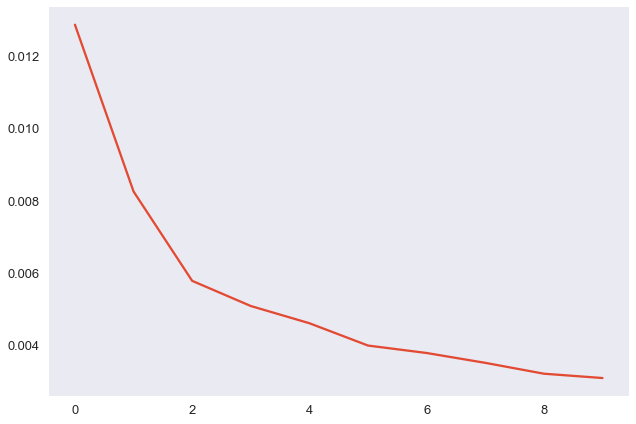

In [273]:
plt.plot(list(range(0,max_k)),inertia)

In [267]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatter(x=np.arange(1,max_k+1),y=inertia))
fig.update_layout(title="Inertia vs Cluster Number",xaxis=dict(range=[0,max_k],title="Cluster Number"),
                  yaxis={'title':'Inertia'},
                 annotations=[
        dict(
            x=k,
            y=inertia[k+1],
            xref="x",
            yref="y",
            text="Elbow!",
            showarrow=True,
            arrowhead=7,
            ax=40,
            ay=-40
        )
    ])

In [22]:
# Clustering using optimum value

model = TimeSeriesKMeans(n_clusters=k, metric="dtw")
results = model.fit(x12.drop(columns = ["station_code"]))

In [41]:
trains.shape

(5078, 27)

In [23]:
# Merge and prepare cluster data

clusterLabel = pd.Series(results.labels_).to_frame()
clusters = pd.concat([weekday, clusterLabel], axis = 1)
clustersClean = clusters[["station_code", 0]]
clusterTime = pd.merge(trains, clustersClean, on = "station_code")
clusterTime.head()

,hour,station_code,day_type,code,code2,code3,interchange,NS,SW,CC,EW,NE,BP,CE,DT,PW,TE,PE,CG,SE,name,tap_in_vol,tap_out_vol,totalTapIn,totalTapOut,percentIn,percentOut,0
0,5,BP6/DT1,weekday,BP6,DT1,NaN,True,NaN,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,Bukit Panjang,9082.00,8842.75,503763.25,540350.25,0.018028,0.016365,0
1,5,BP6/DT1,weekend,BP6,DT1,NaN,True,NaN,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,Bukit Panjang,1680.75,1452.50,178252.00,185204.75,0.009429,0.007843,0
2,6,BP6/DT1,weekday,BP6,DT1,NaN,True,NaN,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,Bukit Panjang,37389.00,21041.75,503763.25,540350.25,0.074219,0.038941,0
3,6,BP6/DT1,weekend,BP6,DT1,NaN,True,NaN,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,Bukit Panjang,5584.75,2855.50,178252.00,185204.75,0.031331,0.015418,0
4,7,BP6/DT1,weekday,BP6,DT1,NaN,True,NaN,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,Bukit Panjang,67522.00,37424.25,503763.25,540350.25,0.134035,0.069259,0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


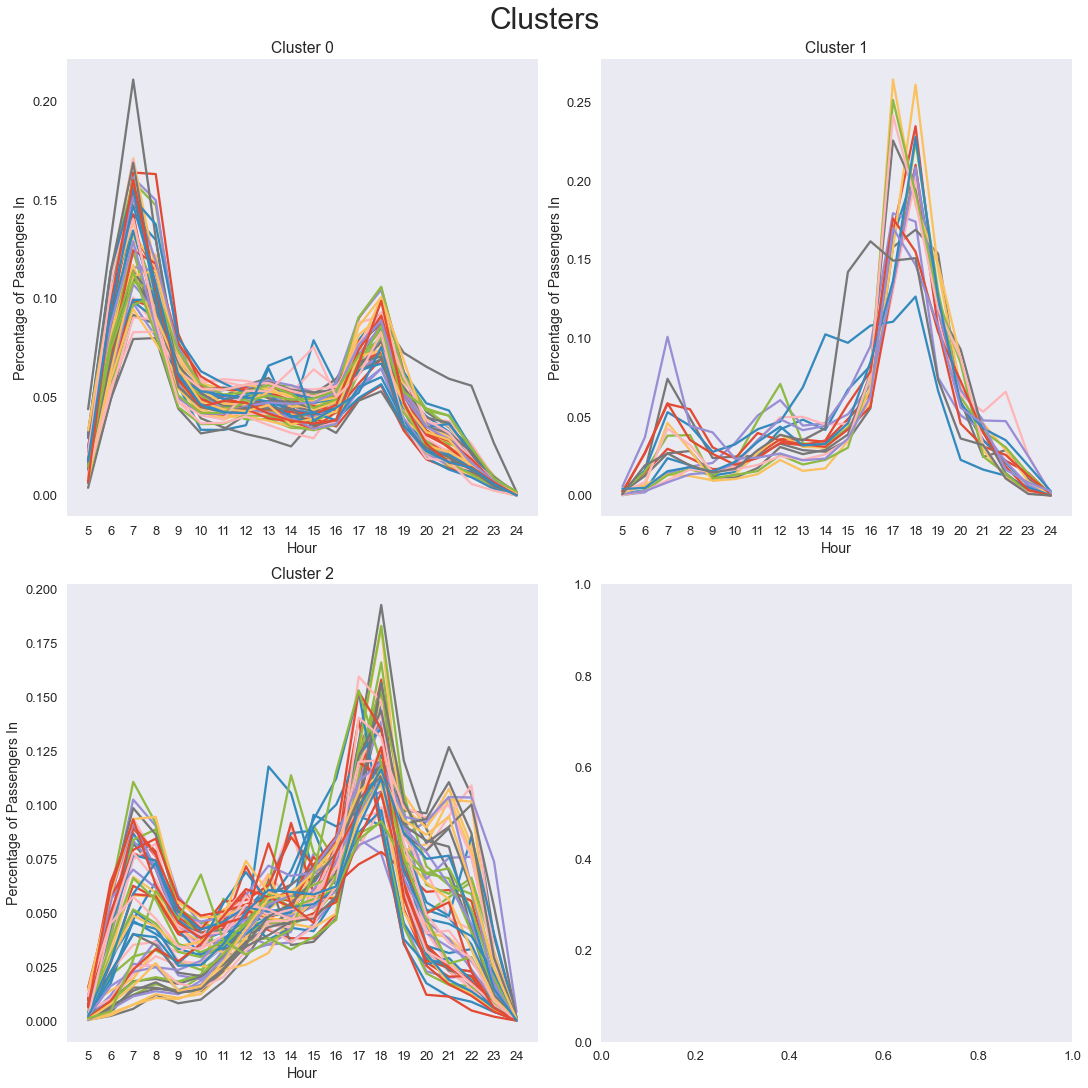

In [251]:
plt.style.use('seaborn-talk')

n_Clusters = k

f, axes = plt.subplots(-1 * (-n_Clusters // 2), 2, figsize=(15, 15), constrained_layout=True)

for i in range(n_Clusters):
    x = i//2
    y = i%2
    
    cluster = clusterTime.loc[(clusterTime[0] == i) & (clusterTime["day_type"] == "weekday")].groupby(["station_code"])

    for name, group in cluster:
        #group.plot.line(x = 'hour', y = 'percentIn')
        axes[x,y].plot(group['hour'], group['percentIn'])
    axes[x,y].legend()
    axes[x,y].set_title(f"Cluster {i}")
    axes[x,y].set_xlabel("Hour")
    axes[x,y].set_ylabel("Percentage of Passengers In")
    axes[x,y].set_xticks(np.arange(min(clusterTime.hour), max(clusterTime.hour)+1))

f.suptitle('Clusters', size=30)
plt.show()

In [25]:
len(model.cluster_centers_[0].ravel())
#print(model.cluster_centers_[0])

40

## Visualising the Clusters

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


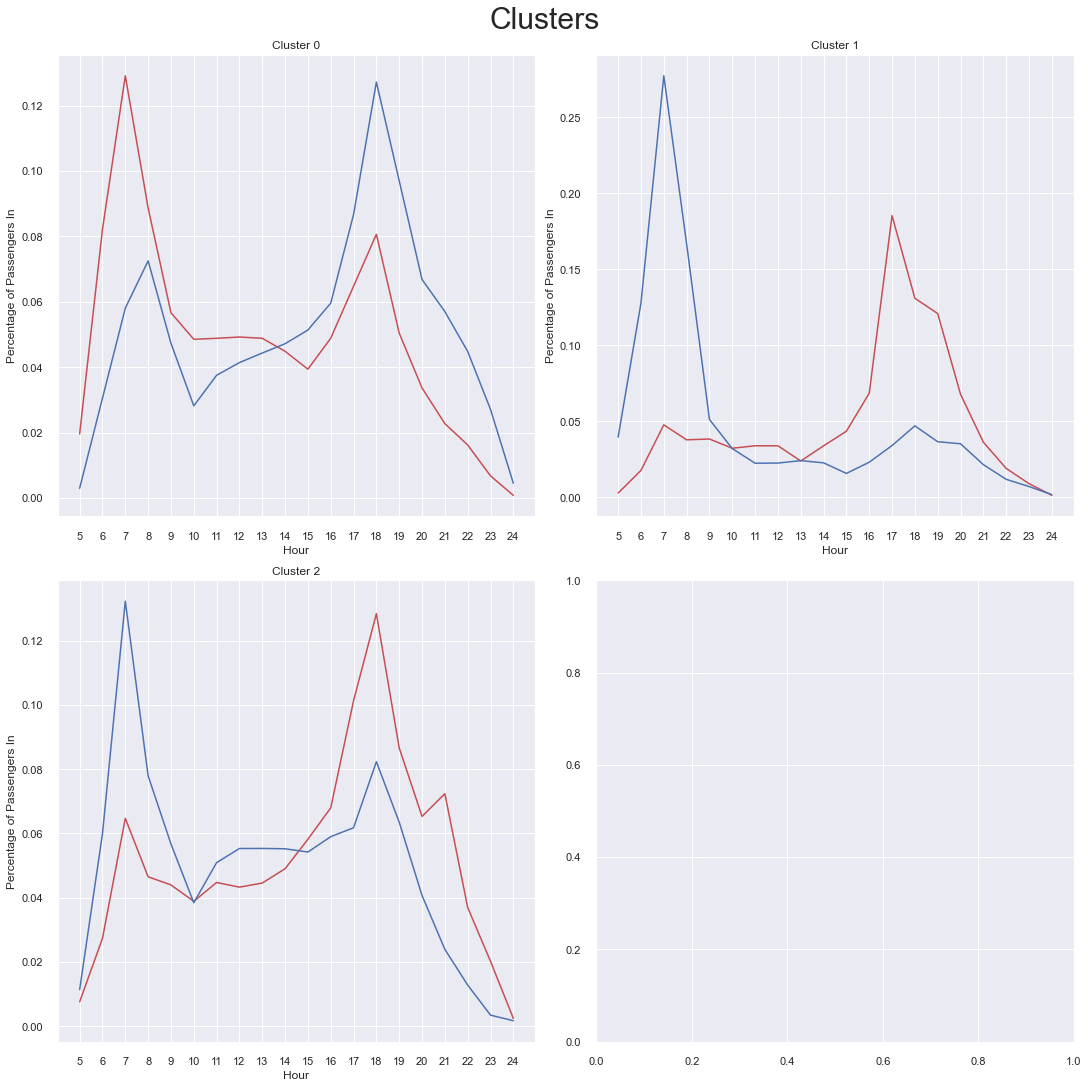

In [305]:
n_Clusters = k

f, axes = plt.subplots(-1 * (-n_Clusters // 2), 2, figsize=(15, 15), constrained_layout=True)

for i in range(n_Clusters):
    x = i//2
    y = i%2
    
    axes[x,y].plot([i for i in range(5,25)], model.cluster_centers_[i].ravel()[0:20], "r-")
    axes[x,y].plot([i for i in range(5,25)], model.cluster_centers_[i].ravel()[20:40], "b-")
#     axes[x,y].plot([i for i in range(5,25)], model.cluster_centers_[i].ravel()[41:61], "g-")
#     axes[x,y].plot([i for i in range(5,25)], model.cluster_centers_[i].ravel()[61:81], "y-")
    axes[x,y].legend()
    axes[x,y].set_title(f"Cluster {i}")
    axes[x,y].set_xlabel("Hour")
    axes[x,y].set_ylabel("Percentage of Passengers In")
    axes[x,y].set_xticks(np.arange(min(clusterTime.hour), max(clusterTime.hour)+1))

f.suptitle('Clusters', size=30)
plt.show()

In [67]:
clusterTime.to_csv("3clusters.csv")

# Predicting Clusters with Station Attributes

In [198]:
stationData = pd.read_csv('mrt_with_bus_and_pop_clean.csv')
stationData.head()

,postal,x,y,lat,long,name,subzone,area,region,code,status,bus_interchange,mrt_interchange,code1,code2,code3,CC,NE,NS,DT,EW,CG,BP,TE,CE,svc,bus count,pop
0,534803,34128.79235,35258.74882,1.335142,103.888389,Tai Seng,Tai Seng,Hougang,North-East,CC11,operational,False,False,CC11,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"24,70,151,80A,76,58A,43,158,62A,90A,62,90,22,9...",20,13830.0
1,539788,33214.93397,36072.52553,1.342501,103.880178,Bartley,Bidadari,Toa Payoh,Central,CC12,operational,False,False,CC12,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"93,158,129,28",4,NaN
2,554533,31431.40547,37079.94437,1.351612,103.864152,Lorong Chuan,Lorong Chuan,Serangoon,North-East,CC14,operational,False,False,CC14,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"105,58",2,8490.0
3,573993,28679.36877,36758.71365,1.348707,103.839423,Marymount,Upper Thomson,Bishan,Central,CC16,operational,False,False,CC16,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"163,130,167,851,54,165,410G,162M,74,52,162,855...",18,29390.0
4,299176,27707.41657,35102.48027,1.333729,103.830690,Bukit Brown,Mount Pleasant,Novena,Central,CC18,future,False,False,CC18,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,690.0


In [199]:
clusterTime.head()

,hour,station_code,day_type,code,code2,code3,interchange,NS,SW,CC,EW,NE,BP,CE,DT,PW,TE,PE,CG,SE,name,tap_in_vol,tap_out_vol,totalTapIn,totalTapOut,percentIn,percentOut,0
0,5,BP6/DT1,weekday,BP6,DT1,NaN,True,NaN,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,Bukit Panjang,9082.00,8842.75,503763.25,540350.25,0.018028,0.016365,0
1,5,BP6/DT1,weekend,BP6,DT1,NaN,True,NaN,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,Bukit Panjang,1680.75,1452.50,178252.00,185204.75,0.009429,0.007843,0
2,6,BP6/DT1,weekday,BP6,DT1,NaN,True,NaN,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,Bukit Panjang,37389.00,21041.75,503763.25,540350.25,0.074219,0.038941,0
3,6,BP6/DT1,weekend,BP6,DT1,NaN,True,NaN,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,Bukit Panjang,5584.75,2855.50,178252.00,185204.75,0.031331,0.015418,0
4,7,BP6/DT1,weekday,BP6,DT1,NaN,True,NaN,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,Bukit Panjang,67522.00,37424.25,503763.25,540350.25,0.134035,0.069259,0


In [226]:
combinedData = pd.merge(clusterTime, stationData,
                  left_on=['CC', 'NE', 'NS', 'DT', 'EW', 'CG', 'CG', 'TE'], 
                  right_on=['CC', 'NE', 'NS', 'DT', 'EW', 'CG', 'CG', 'TE'],
                  how='left')

combinedData.drop(columns = 'day_type', inplace=True)

combinedData.drop_duplicates(subset=['station_code'], inplace=True)

combinedData.rename(columns={0:"Cluster"}, inplace = True)

combinedData.head()

,hour,station_code,code_x,code2_x,code3_x,interchange,NS,SW,CC,EW,NE,BP_x,CE_x,DT,PW,TE,PE,CG,SE,name_x,tap_in_vol,tap_out_vol,totalTapIn,totalTapOut,percentIn,percentOut,Cluster,postal,x,y,lat,long,name_y,subzone,area,region,code_y,status,bus_interchange,mrt_interchange,code1,code2_y,code3_y,BP_y,CE_y,svc,bus count,pop
0,5,BP6/DT1,BP6,DT1,NaN,True,NaN,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,Bukit Panjang,9082.00,8842.75,503763.25,540350.25,0.018028,0.016365,0,678213.0,20011.39812,40108.68377,1.379002,103.761535,Bukit Panjang,Gombak,Bukit Batok,West,DT1/BP6,operational,True,True,DT1,BP6,NaN,6.0,NaN,"170A,974A,972A,176,180A,190A,963,961M,180,171,...",36.0,9930.0
40,5,CC10/DT26,CC10,DT26,NaN,True,NaN,NaN,10.0,NaN,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,MacPherson,2548.00,496.25,229332.25,218221.75,0.011111,0.002274,2,378956.0,34230.01048,34264.54353,1.326150,103.889299,Macpherson,Macpherson,Geylang,Central,DT26/CC10,operational,False,True,DT26,CC10,NaN,NaN,NaN,"24,155,135,154,70,80A,137,76,43,158,63A,65,43e...",21.0,28360.0
80,5,CC11,CC11,NaN,NaN,False,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tai Seng,507.75,917.75,222885.50,225728.50,0.002278,0.004066,1,534803.0,34128.79235,35258.74882,1.335142,103.888389,Tai Seng,Tai Seng,Hougang,North-East,CC11,operational,False,False,CC11,NaN,NaN,NaN,NaN,"24,70,151,80A,76,58A,43,158,62A,90A,62,90,22,9...",20.0,13830.0
120,5,CC12,CC12,NaN,NaN,False,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bartley,372.50,100.25,87827.50,75543.75,0.004241,0.001327,2,539788.0,33214.93397,36072.52553,1.342501,103.880178,Bartley,Bidadari,Toa Payoh,Central,CC12,operational,False,False,CC12,NaN,NaN,NaN,NaN,"93,158,129,28",4.0,NaN
160,5,CC14,CC14,NaN,NaN,False,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lorong Chuan,873.25,396.75,104689.00,100974.75,0.008341,0.003929,2,554533.0,31431.40547,37079.94437,1.351612,103.864152,Lorong Chuan,Lorong Chuan,Serangoon,North-East,CC14,operational,False,False,CC14,NaN,NaN,NaN,NaN,"105,58",2.0,8490.0


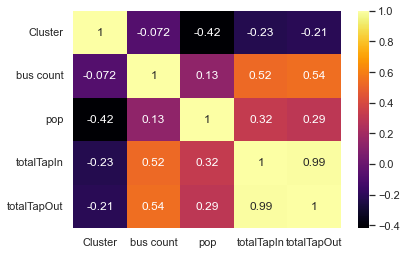

In [227]:
dataplot = sb.heatmap(
    combinedData[["Cluster", "bus_interchange", "mrt_interchange", "bus count", "pop", "totalTapIn", "totalTapOut"]].corr(),
    cmap="inferno", annot=True)

In [228]:
combinedData.head()

,hour,station_code,code_x,code2_x,code3_x,interchange,NS,SW,CC,EW,NE,BP_x,CE_x,DT,PW,TE,PE,CG,SE,name_x,tap_in_vol,tap_out_vol,totalTapIn,totalTapOut,percentIn,percentOut,Cluster,postal,x,y,lat,long,name_y,subzone,area,region,code_y,status,bus_interchange,mrt_interchange,code1,code2_y,code3_y,BP_y,CE_y,svc,bus count,pop
0,5,BP6/DT1,BP6,DT1,NaN,True,NaN,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,Bukit Panjang,9082.00,8842.75,503763.25,540350.25,0.018028,0.016365,0,678213.0,20011.39812,40108.68377,1.379002,103.761535,Bukit Panjang,Gombak,Bukit Batok,West,DT1/BP6,operational,True,True,DT1,BP6,NaN,6.0,NaN,"170A,974A,972A,176,180A,190A,963,961M,180,171,...",36.0,9930.0
40,5,CC10/DT26,CC10,DT26,NaN,True,NaN,NaN,10.0,NaN,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,MacPherson,2548.00,496.25,229332.25,218221.75,0.011111,0.002274,2,378956.0,34230.01048,34264.54353,1.326150,103.889299,Macpherson,Macpherson,Geylang,Central,DT26/CC10,operational,False,True,DT26,CC10,NaN,NaN,NaN,"24,155,135,154,70,80A,137,76,43,158,63A,65,43e...",21.0,28360.0
80,5,CC11,CC11,NaN,NaN,False,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tai Seng,507.75,917.75,222885.50,225728.50,0.002278,0.004066,1,534803.0,34128.79235,35258.74882,1.335142,103.888389,Tai Seng,Tai Seng,Hougang,North-East,CC11,operational,False,False,CC11,NaN,NaN,NaN,NaN,"24,70,151,80A,76,58A,43,158,62A,90A,62,90,22,9...",20.0,13830.0
120,5,CC12,CC12,NaN,NaN,False,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bartley,372.50,100.25,87827.50,75543.75,0.004241,0.001327,2,539788.0,33214.93397,36072.52553,1.342501,103.880178,Bartley,Bidadari,Toa Payoh,Central,CC12,operational,False,False,CC12,NaN,NaN,NaN,NaN,"93,158,129,28",4.0,NaN
160,5,CC14,CC14,NaN,NaN,False,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lorong Chuan,873.25,396.75,104689.00,100974.75,0.008341,0.003929,2,554533.0,31431.40547,37079.94437,1.351612,103.864152,Lorong Chuan,Lorong Chuan,Serangoon,North-East,CC14,operational,False,False,CC14,NaN,NaN,NaN,NaN,"105,58",2.0,8490.0


In [229]:
combinedData[["area", "code_x", "name_x", "Cluster"]].head(-30)

,area,code_x,name_x,Cluster
0,Bukit Batok,BP6,Bukit Panjang,0
40,Geylang,CC10,MacPherson,2
80,Hougang,CC11,Tai Seng,1
120,Toa Payoh,CC12,Bartley,2
160,Serangoon,CC14,Lorong Chuan,2
200,Bishan,CC16,Marymount,2
240,Toa Payoh,CC17,Caldecott,0
280,Tanglin,CC19,Botanic Gardens,2
320,Museum,CC2,Bras Basah,2
360,Bukit Timah,CC20,Farrer Road,2


In [230]:
combinedData['pop'] = combinedData['pop'].fillna(0)

In [231]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [232]:
combinedData.head(1)

,hour,station_code,code_x,code2_x,code3_x,interchange,NS,SW,CC,EW,NE,BP_x,CE_x,DT,PW,TE,PE,CG,SE,name_x,tap_in_vol,tap_out_vol,totalTapIn,totalTapOut,percentIn,percentOut,Cluster,postal,x,y,lat,long,name_y,subzone,area,region,code_y,status,bus_interchange,mrt_interchange,code1,code2_y,code3_y,BP_y,CE_y,svc,bus count,pop
0,5,BP6/DT1,BP6,DT1,NaN,True,NaN,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,Bukit Panjang,9082.0,8842.75,503763.25,540350.25,0.018028,0.016365,0,678213.0,20011.39812,40108.68377,1.379002,103.761535,Bukit Panjang,Gombak,Bukit Batok,West,DT1/BP6,operational,True,True,DT1,BP6,NaN,6.0,NaN,"170A,974A,972A,176,180A,190A,963,961M,180,171,...",36.0,9930.0


In [233]:
combinedData.dropna(subset=['pop'], inplace = True)

In [234]:
# check if NA left in Xtrain
combinedData[["bus_interchange", "mrt_interchange", "bus count", "pop", "totalTapIn", "totalTapOut"]].loc[combinedData[["bus_interchange", "mrt_interchange", "bus count", "pop", "totalTapIn", "totalTapOut"]].isnull().any(axis = 1)]

,bus_interchange,mrt_interchange,bus count,pop,totalTapIn,totalTapOut
1080,NaN,NaN,NaN,0.0,70168.00,57205.25
2280,NaN,NaN,NaN,0.0,385618.00,367691.25
4360,NaN,NaN,NaN,0.0,654895.25,701426.25
4480,NaN,NaN,NaN,0.0,37991.25,37948.25


### Discriminant Pred

In [185]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis(solver = 'eigen', shrinkage = 'auto')
clf.fit(X_train, y_train)
# Predict Response corresponding to Predictors
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

y_train_NP = y_train.to_numpy()
resultsTrain = y_train_NP - y_train_pred
train_acc = np.count_nonzero(resultsTrain==0)/y_train_NP.size

print("Train Accuracy =", train_acc)

############## TEST
y_test_NP = y_test.to_numpy()
resultsTest = y_test_NP - y_test_pred
test_acc = np.count_nonzero(resultsTest==0)/y_test_NP.size

print("Test Accuracy =", test_acc)



Train Accuracy = 0.5841584158415841
Test Accuracy = 0.7307692307692307


# Log Reg Pred

In [235]:
training = combinedData[["bus_interchange", "mrt_interchange", 
                   "pop", "totalTapIn", "totalTapOut", 
                "Cluster"]].dropna()

y = training["Cluster"]
X = training[[
                   "bus_interchange", "mrt_interchange", 
                   "pop", "totalTapIn", "totalTapOut", 
                   ]].dropna()
print(X.shape)

# Split the Dataset into random Train and Test (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

logReg = LogisticRegression(multi_class= 'multinomial', solver = 'saga', max_iter = 100000)         # create the linear regression object
logReg.fit(X_train, y_train)        # train the linear regression model


# Predict Response corresponding to Predictors
y_train_pred = logReg.predict(X_train)
y_test_pred = logReg.predict(X_test)


############## TRAIN
y_train_NP = y_train.to_numpy()
resultsTrain = y_train_NP - y_train_pred
train_acc = np.count_nonzero(resultsTrain==0)/y_train_NP.size

print("Train Accuracy =", train_acc)

############## TEST
y_test_NP = y_test.to_numpy()
resultsTest = y_test_NP - y_test_pred
test_acc = np.count_nonzero(resultsTest==0)/y_test_NP.size

print("Test Accuracy =", test_acc)


# ############## OTHER SHIT
# cv = RepeatedStratifiedKFold(n_splits=20, n_repeats=2, random_state=1)
# n_scores = cross_val_score(logReg, X_train, y_train, scoring='accuracy', cv = cv)
# print('Mean Accuracy[Train]: %.3f (%.3f)' % (mean(np.nan_to_num(n_scores)), std(np.nan_to_num(n_scores))))
# n_scores = cross_val_score(logReg, X_test, y_test, scoring='accuracy', cv = cv)
# print('Mean Accuracy[Test]: %.3f (%.3f)' % (mean(np.nan_to_num(n_scores)), std(np.nan_to_num(n_scores))))


# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# # Check the Goodness of Fit (on Train Data)
# n_scores = cross_val_score(logReg, X_train, y_train, scoring='accuracy', cv = cv)
# print('Mean Accuracy[Train]: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# print()/

# # Check the Goodness of Fit (on Test Data)
# n_scores = cross_val_score(logReg, X_test, y_test, scoring='accuracy', cv = cv)
# print('Mean Accuracy[Test]: %.3f (%.3f)' % (mean(n_scores), std(n_scoreaas)))
# print()

(123, 5)
Train Accuracy = 0.6224489795918368
Test Accuracy = 0.64


# Linear Reg
The wrong approach in this instance for categorical data

Intercept 	: b =  1.5557601539487633
Coefficients 	: a =  [-5.73354319e-01  1.57897918e-01  7.02976451e-03 -2.09516723e-06
 -4.10365112e-06  4.20677927e-06]


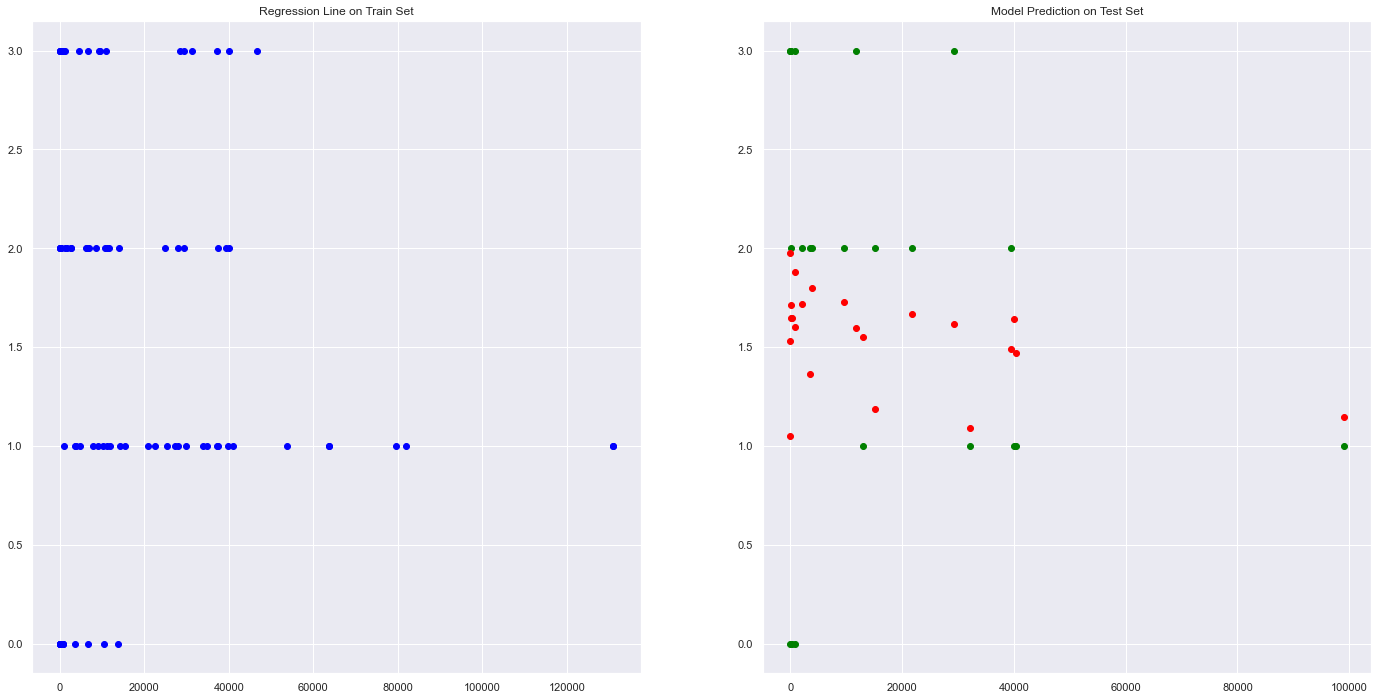

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.051841273981156566
Mean Squared Error (MSE) 	: 0.9380310165332446

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 1.081709182345789



In [129]:
combinedData = combinedData.sort_values(by = ['pop'])

y = combinedData["Cluster"]
X = combinedData[["bus_interchange", "mrt_interchange", "bus count", "pop", "totalTapIn", "totalTapOut"]].to_numpy()

# Split the Dataset into random Train and Test (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Print the coefficients of the Regression Line
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(X_train[:,3], y_train, color = "blue")
#axes[0].plot(regline_x, regline_y, 'r-', linewidth = 3)
axes[0].set_title("Regression Line on Train Set")
axes[1].scatter(X_test[:,3], y_test, color = "green")
axes[1].scatter(X_test[:,3], y_test_pred, color = "red")
axes[1].set_title("Model Prediction on Test Set")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

#### Data Cleaning

In [236]:
combinedData.head()

,hour,station_code,code_x,code2_x,code3_x,interchange,NS,SW,CC,EW,NE,BP_x,CE_x,DT,PW,TE,PE,CG,SE,name_x,tap_in_vol,tap_out_vol,totalTapIn,totalTapOut,percentIn,percentOut,Cluster,postal,x,y,lat,long,name_y,subzone,area,region,code_y,status,bus_interchange,mrt_interchange,code1,code2_y,code3_y,BP_y,CE_y,svc,bus count,pop
0,5,BP6/DT1,BP6,DT1,NaN,True,NaN,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,Bukit Panjang,9082.00,8842.75,503763.25,540350.25,0.018028,0.016365,0,678213.0,20011.39812,40108.68377,1.379002,103.761535,Bukit Panjang,Gombak,Bukit Batok,West,DT1/BP6,operational,True,True,DT1,BP6,NaN,6.0,NaN,"170A,974A,972A,176,180A,190A,963,961M,180,171,...",36.0,9930.0
40,5,CC10/DT26,CC10,DT26,NaN,True,NaN,NaN,10.0,NaN,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,MacPherson,2548.00,496.25,229332.25,218221.75,0.011111,0.002274,2,378956.0,34230.01048,34264.54353,1.326150,103.889299,Macpherson,Macpherson,Geylang,Central,DT26/CC10,operational,False,True,DT26,CC10,NaN,NaN,NaN,"24,155,135,154,70,80A,137,76,43,158,63A,65,43e...",21.0,28360.0
80,5,CC11,CC11,NaN,NaN,False,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tai Seng,507.75,917.75,222885.50,225728.50,0.002278,0.004066,1,534803.0,34128.79235,35258.74882,1.335142,103.888389,Tai Seng,Tai Seng,Hougang,North-East,CC11,operational,False,False,CC11,NaN,NaN,NaN,NaN,"24,70,151,80A,76,58A,43,158,62A,90A,62,90,22,9...",20.0,13830.0
120,5,CC12,CC12,NaN,NaN,False,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bartley,372.50,100.25,87827.50,75543.75,0.004241,0.001327,2,539788.0,33214.93397,36072.52553,1.342501,103.880178,Bartley,Bidadari,Toa Payoh,Central,CC12,operational,False,False,CC12,NaN,NaN,NaN,NaN,"93,158,129,28",4.0,0.0
160,5,CC14,CC14,NaN,NaN,False,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lorong Chuan,873.25,396.75,104689.00,100974.75,0.008341,0.003929,2,554533.0,31431.40547,37079.94437,1.351612,103.864152,Lorong Chuan,Lorong Chuan,Serangoon,North-East,CC14,operational,False,False,CC14,NaN,NaN,NaN,NaN,"105,58",2.0,8490.0


In [238]:
combinedData.drop(columns = [
                    "hour",
                    "tap_in_vol", "tap_out_vol","percentIn", "percentOut",
                    "code1", "code2_y", "code3_y",
                    "name_y", "code_y","BP_y", "CE_y"
                    ], inplace=True)

In [657]:
combinedData.drop(columns )
combinedData.head()

,Unnamed: 0,postal,x,y,lat,long,name_x,subzone,area,region,code_x,status,bus_interchange,mrt_interchange,code1,code2_x,code3_x,CC_x,NE_x,NS_x,DT_x,EW_x,CG_x,BP_x,TE_x,CE_x,svc,bus count,pop,hub,min_dist,nearest_hub,bus_rank,pop_rank,dist_rank,pop-bus_rank,hour,station_code,interchange,SW,PW,PE,SE,tap_in_vol,tap_out_vol,totalTapIn,totalTapOut,percentIn,percentOut,Cluster
0,0,534803,34128.79235,35258.74882,1.335142,103.888389,Tai Seng,Tai Seng,Hougang,North-East,CC11,operational,False,False,CC11,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"24,70,151,80A,76,58A,43,158,62A,90A,62,90,22,9...",20,13830.0,False,6.624440,Tampines,0.621951,0.593496,0.821138,-0.028455,5,CC11,False,NaN,NaN,NaN,NaN,507.75,917.75,222885.50,225728.50,0.002278,0.004066,0
40,2,554533,31431.40547,37079.94437,1.351612,103.864152,Lorong Chuan,Lorong Chuan,Serangoon,North-East,CC14,operational,False,False,CC14,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"105,58",2,8490.0,False,7.635612,Raffles Place,0.052846,0.463415,0.910569,0.410569,5,CC14,False,NaN,NaN,NaN,NaN,873.25,396.75,104689.00,100974.75,0.008341,0.003929,2
80,3,573993,28679.36877,36758.71365,1.348707,103.839423,Marymount,Upper Thomson,Bishan,Central,CC16,operational,False,False,CC16,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"163,130,167,851,54,165,410G,162M,74,52,162,855...",18,29390.0,False,7.304788,Raffles Place,0.565041,0.756098,0.886179,0.191057,5,CC16,False,NaN,NaN,NaN,NaN,1178.50,307.25,118507.00,114434.50,0.009945,0.002685,1
120,5,257494,25959.60050,33818.14422,1.322114,103.814984,Botanic Gardens,Tyersall,Tanglin,Central,CC19/DT9,operational,False,True,CC19,DT9,NaN,19.0,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,"170A,186,153,154,151,48,67,156",8,3880.0,False,5.855440,Raffles Place,0.223577,0.390244,0.699187,0.166667,5,CC19/DT9,True,NaN,NaN,NaN,NaN,388.00,486.75,77084.00,83539.75,0.005033,0.005827,1
160,6,189561,29930.76738,31025.90160,1.296862,103.850667,Bras Basah,Bras Basah,Museum,Central,CC2,operational,False,False,CC2,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"130,147,850E,124,147A,162M,7A,12,131,502,2A,13...",57,10.0,False,1.418937,Raffles Place,0.991870,0.032520,0.146341,-0.959350,5,CC2,False,NaN,NaN,NaN,NaN,67.00,65.75,49258.75,52827.75,0.001360,0.001245,1


### Add future stations

In [239]:
allStations = pd.read_csv("mrt_with_bus_and_pop_clean.csv")

In [240]:
#allStations.drop(columns = ["Unnamed: 0", "cluster"], inplace= True)
allStations.head()

,postal,x,y,lat,long,name,subzone,area,region,code,status,bus_interchange,mrt_interchange,code1,code2,code3,CC,NE,NS,DT,EW,CG,BP,TE,CE,svc,bus count,pop
0,534803,34128.79235,35258.74882,1.335142,103.888389,Tai Seng,Tai Seng,Hougang,North-East,CC11,operational,False,False,CC11,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"24,70,151,80A,76,58A,43,158,62A,90A,62,90,22,9...",20,13830.0
1,539788,33214.93397,36072.52553,1.342501,103.880178,Bartley,Bidadari,Toa Payoh,Central,CC12,operational,False,False,CC12,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"93,158,129,28",4,NaN
2,554533,31431.40547,37079.94437,1.351612,103.864152,Lorong Chuan,Lorong Chuan,Serangoon,North-East,CC14,operational,False,False,CC14,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"105,58",2,8490.0
3,573993,28679.36877,36758.71365,1.348707,103.839423,Marymount,Upper Thomson,Bishan,Central,CC16,operational,False,False,CC16,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"163,130,167,851,54,165,410G,162M,74,52,162,855...",18,29390.0
4,299176,27707.41657,35102.48027,1.333729,103.830690,Bukit Brown,Mount Pleasant,Novena,Central,CC18,future,False,False,CC18,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,690.0


In [241]:
combinedData.head(1)

,station_code,code_x,code2_x,code3_x,interchange,NS,SW,CC,EW,NE,BP_x,CE_x,DT,PW,TE,PE,CG,SE,name_x,totalTapIn,totalTapOut,Cluster,postal,x,y,lat,long,subzone,area,region,status,bus_interchange,mrt_interchange,svc,bus count,pop
0,BP6/DT1,BP6,DT1,NaN,True,NaN,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,Bukit Panjang,503763.25,540350.25,0,678213.0,20011.39812,40108.68377,1.379002,103.761535,Gombak,Bukit Batok,West,operational,True,True,"170A,974A,972A,176,180A,190A,963,961M,180,171,...",36.0,9930.0


In [242]:
combinedData.rename(columns={"name_x":"name","code_x":"code", "code2_x":"code2", "code3_x":"code3", 
                           "BP_x":"BP","TE_x":"TE","CE_x":"CE",
                            },inplace=True)
combinedData.head()

,station_code,code,code2,code3,interchange,NS,SW,CC,EW,NE,BP,CE,DT,PW,TE,PE,CG,SE,name,totalTapIn,totalTapOut,Cluster,postal,x,y,lat,long,subzone,area,region,status,bus_interchange,mrt_interchange,svc,bus count,pop
0,BP6/DT1,BP6,DT1,NaN,True,NaN,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,Bukit Panjang,503763.25,540350.25,0,678213.0,20011.39812,40108.68377,1.379002,103.761535,Gombak,Bukit Batok,West,operational,True,True,"170A,974A,972A,176,180A,190A,963,961M,180,171,...",36.0,9930.0
40,CC10/DT26,CC10,DT26,NaN,True,NaN,NaN,10.0,NaN,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,MacPherson,229332.25,218221.75,2,378956.0,34230.01048,34264.54353,1.326150,103.889299,Macpherson,Geylang,Central,operational,False,True,"24,155,135,154,70,80A,137,76,43,158,63A,65,43e...",21.0,28360.0
80,CC11,CC11,NaN,NaN,False,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tai Seng,222885.50,225728.50,1,534803.0,34128.79235,35258.74882,1.335142,103.888389,Tai Seng,Hougang,North-East,operational,False,False,"24,70,151,80A,76,58A,43,158,62A,90A,62,90,22,9...",20.0,13830.0
120,CC12,CC12,NaN,NaN,False,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bartley,87827.50,75543.75,2,539788.0,33214.93397,36072.52553,1.342501,103.880178,Bidadari,Toa Payoh,Central,operational,False,False,"93,158,129,28",4.0,0.0
160,CC14,CC14,NaN,NaN,False,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lorong Chuan,104689.00,100974.75,2,554533.0,31431.40547,37079.94437,1.351612,103.864152,Lorong Chuan,Serangoon,North-East,operational,False,False,"105,58",2.0,8490.0


In [243]:
allStations[allStations["status"]=="future"]

,postal,x,y,lat,long,name,subzone,area,region,code,status,bus_interchange,mrt_interchange,code1,code2,code3,CC,NE,NS,DT,EW,CG,BP,TE,CE,svc,bus count,pop
4,299176,27707.41657,35102.48027,1.333729,103.830690,Bukit Brown,Mount Pleasant,Novena,Central,CC18,future,False,False,CC18,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,690.0
16,99423,27634.16874,28030.47992,1.269772,103.830031,Keppel,City Terminals,Bukit Merah,Central,CC30,future,False,False,CC30,NaN,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"NR6,145,30,57,97,NR1,100,80,10,131",10,20.0
17,89395,28416.64846,28373.25579,1.272872,103.837062,Cantonment,Everton Park,Bukit Merah,Central,CC31,future,False,False,CC31,NaN,NaN,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"145,30,57,97,100,80,10,131,97e",9,7810.0
18,79122,29533.44444,28404.75026,1.273157,103.847097,Prince Edward Road,Central Subzone,Downtown Core,Central,CC32,future,False,False,CC32,NaN,NaN,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"130,186,672,670,653,850E,651,671,70,666,196A,5...",34,880.0
47,486800,42643.96238,34569.68530,1.328907,103.964903,Xilin,Xilin,Tampines,East,DT36,future,False,False,DT36,NaN,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,"35M,35",2,1760.0
73,828604,36552.07067,44081.13346,1.414927,103.910166,Punggol Coast,Northshore,Punggol,North-East,NE18,future,False,False,NE18,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,460.0
94,299781,28208.11219,34531.43523,1.328565,103.835189,Mount Pleasant,Mount Pleasant,Novena,Central,TE10,future,False,False,TE10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,0,690.0
95,258511,26402.80266,32122.95592,1.306783,103.818967,Napier,Nassim,Tanglin,Central,TE12,future,False,False,TE12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,"7,123,105,174,106,NR8,75,7B,77,174e",10,9520.0
96,248654,26948.29454,31640.75525,1.302422,103.823869,Orchard Boulevard,One Tree Hill,River Valley,Central,TE13,future,False,False,TE13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,"111,7,105,174,123,106,NR8,75,77,132,174e",11,2070.0
98,238384,28044.76787,30703.73245,1.293948,103.833721,Great World,Institution Hill,River Valley,Central,TE15,future,False,False,TE15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,"5,195,75,175,970,195A,NR5,16,16M",9,3150.0


In [244]:
test = pd.concat([combinedData, allStations[allStations["status"]=="future"]])


In [245]:
test.shape

(151, 37)

In [246]:
test.to_csv("dataCombined_3Clusters.csv")

In [137]:
stationsWithLatLng = pd.read_csv("mrt_with_bus_and_pop_clean.csv")

In [139]:
stationsWithLatLng.head()

,postal,x,y,lat,long,name,subzone,area,region,code,status,bus_interchange,mrt_interchange,code1,code2,code3,CC,NE,NS,DT,EW,CG,BP,TE,CE,svc,bus count,pop
0,534803,34128.79235,35258.74882,1.335142,103.888389,Tai Seng,Tai Seng,Hougang,North-East,CC11,operational,False,False,CC11,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"24,70,151,80A,76,58A,43,158,62A,90A,62,90,22,9...",20,13830.0
1,539788,33214.93397,36072.52553,1.342501,103.880178,Bartley,Bidadari,Toa Payoh,Central,CC12,operational,False,False,CC12,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"93,158,129,28",4,NaN
2,554533,31431.40547,37079.94437,1.351612,103.864152,Lorong Chuan,Lorong Chuan,Serangoon,North-East,CC14,operational,False,False,CC14,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"105,58",2,8490.0
3,573993,28679.36877,36758.71365,1.348707,103.839423,Marymount,Upper Thomson,Bishan,Central,CC16,operational,False,False,CC16,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"163,130,167,851,54,165,410G,162M,74,52,162,855...",18,29390.0
4,299176,27707.41657,35102.48027,1.333729,103.830690,Bukit Brown,Mount Pleasant,Novena,Central,CC18,future,False,False,CC18,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,690.0


In [144]:
test[test["code"]=="CC12"]

,station_code,code,code2,code3,interchange,NS,SW,CC,EW,NE,BP,CE,DT,PW,TE,PE,CG,SE,name,totalTapIn,totalTapOut,Cluster,postal,x,y,lat,long,subzone,area,region,status,bus_interchange,mrt_interchange,svc,bus count,pop,hub,min_dist,nearest_hub,bus_rank,pop_rank,dist_rank,pop-bus_rank,code1
120,CC12,CC12,NaN,NaN,False,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bartley,87827.5,75543.75,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [149]:
testNAN = test[test["lat"].isna()]

In [151]:
test.dropna(subset=["lat"], inplace = True)

In [154]:
pd.merge(testNAN, stationsWithLatLng, left_on = ['CC', 'NE', 'NS', 'DT', 'EW', 'CG', 'CG'], right_on = ['CC', 'NE', 'NS', 'DT', 'EW', 'CG', 'CG'], how="inner")

,station_code,code_x,code2_x,code3_x,interchange,NS,SW,CC,EW,NE,BP_x,CE_x,DT,PW,TE_x,PE,CG,SE,name_x,totalTapIn,totalTapOut,Cluster,postal_x,x_x,y_x,lat_x,long_x,subzone_x,area_x,region_x,status_x,bus_interchange_x,mrt_interchange_x,svc_x,bus count_x,pop_x,hub,min_dist,nearest_hub,bus_rank,pop_rank,dist_rank,pop-bus_rank,code1_x,postal_y,x_y,y_y,lat_y,long_y,name_y,subzone_y,area_y,region_y,code_y,status_y,bus_interchange_y,mrt_interchange_y,code1_y,code2_y,code3_y,BP_y,TE_y,CE_y,svc_y,bus count_y,pop_y
0,CC12,CC12,NaN,NaN,False,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bartley,87827.5,75543.75,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,539788,33214.93397,36072.52553,1.342501,103.880178,Bartley,Bidadari,Toa Payoh,Central,CC12,operational,False,False,CC12,NaN,NaN,NaN,NaN,NaN,"93,158,129,28",4,NaN
1,CE1/DT16,CE1,DT16,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16.0,NaN,NaN,NaN,NaN,NaN,Bayfront,282228.0,289490.75,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18957,30867.00927,29368.62503,1.281874,103.859080,Bayfront,Bayfront Subzone,Downtown Core,Central,DT16 / CE1,operational,False,True,DT16,CE1,NaN,NaN,NaN,1.0,"NR6,502A,97,106,NR1,518,502,97e,518A,133",10,NaN
2,NE11,NE11,NaN,NaN,False,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Woodleigh,95206.0,90662.75,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,347695,32173.31857,35706.37936,1.339190,103.870818,Woodleigh,Bidadari,Toa Payoh,Central,NE11,operational,True,False,NE11,NaN,NaN,NaN,NaN,NaN,"155,NR6,853,135,100A,147,506,100,13,147A,107M,...",14,NaN
3,NS28,NS28,NaN,NaN,False,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Marina South Pier,21891.0,22013.00,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18948,31241.82601,28169.25109,1.271027,103.862448,Marina South Pier,Straits View,Straits View,Central,NS28,operational,False,False,NS28,NaN,NaN,NaN,NaN,NaN,400,1,NaN


In [159]:
added = stationsWithLatLng[(stationsWithLatLng["code"]=="CC12") |
                   (stationsWithLatLng["code"]=="DT16 / CE1") |
                   (stationsWithLatLng["code"]=="NE11") |
                   (stationsWithLatLng["code"]=="NS28") 
                  ]

In [162]:
added.head(1)
added.rename(columns={"code":"station_code", "code1":"code", }, inplace=True)

,postal,x,y,lat,long,name,subzone,area,region,code,status,bus_interchange,mrt_interchange,code1,code2,code3,CC,NE,NS,DT,EW,CG,BP,TE,CE,svc,bus count,pop
1,539788,33214.93397,36072.52553,1.342501,103.880178,Bartley,Bidadari,Toa Payoh,Central,CC12,operational,False,False,CC12,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"93,158,129,28",4,NaN


In [163]:
test.head(1)

,station_code,code,code2,code3,interchange,NS,SW,CC,EW,NE,BP,CE,DT,PW,TE,PE,CG,SE,name,totalTapIn,totalTapOut,Cluster,postal,x,y,lat,long,subzone,area,region,status,bus_interchange,mrt_interchange,svc,bus count,pop,hub,min_dist,nearest_hub,bus_rank,pop_rank,dist_rank,pop-bus_rank,code1
0,BP6/DT1,BP6,DT1,NaN,True,NaN,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,Bukit Panjang,503763.25,540350.25,0.0,678213.0,20011.39812,40108.68377,1.379002,103.761535,Gombak,Bukit Batok,West,operational,True,True,"170A,974A,972A,176,180A,190A,963,961M,180,171,...",36.0,9930.0,False,5.529046,Jurong East,0.869919,0.504065,0.650407,-0.365854,NaN


In [161]:
pd.concat([test,added])

,station_code,code,code2,code3,interchange,NS,SW,CC,EW,NE,BP,CE,DT,PW,TE,PE,CG,SE,name,totalTapIn,totalTapOut,Cluster,postal,x,y,lat,long,subzone,area,region,status,bus_interchange,mrt_interchange,svc,bus count,pop,hub,min_dist,nearest_hub,bus_rank,pop_rank,dist_rank,pop-bus_rank,code1
0,BP6/DT1,BP6,DT1,NaN,True,NaN,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,Bukit Panjang,503763.250000,540350.250000,0.0,678213.0,20011.398120,40108.68377,1.379002,103.761535,Gombak,Bukit Batok,West,operational,True,True,"170A,974A,972A,176,180A,190A,963,961M,180,171,...",36.0,9930.0,False,5.529046,Jurong East,0.869919,0.504065,0.650407,-0.365854,NaN
40,CC10/DT26,CC10,DT26,NaN,True,NaN,NaN,10.0,NaN,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,MacPherson,229332.250000,218221.750000,2.0,378956.0,34230.010480,34264.54353,1.326150,103.889299,Macpherson,Geylang,Central,operational,False,True,"24,155,135,154,70,80A,137,76,43,158,63A,65,43e...",21.0,28360.0,False,6.287145,Raffles Place,0.650407,0.735772,0.796748,0.085366,NaN
80,CC11,CC11,NaN,NaN,False,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tai Seng,222885.500000,225728.500000,1.0,534803.0,34128.792350,35258.74882,1.335142,103.888389,Tai Seng,Hougang,North-East,operational,False,False,"24,70,151,80A,76,58A,43,158,62A,90A,62,90,22,9...",20.0,13830.0,False,6.624440,Tampines,0.621951,0.593496,0.821138,-0.028455,NaN
160,CC14,CC14,NaN,NaN,False,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lorong Chuan,104689.000000,100974.750000,2.0,554533.0,31431.405470,37079.94437,1.351612,103.864152,Lorong Chuan,Serangoon,North-East,operational,False,False,"105,58",2.0,8490.0,False,7.635612,Raffles Place,0.052846,0.463415,0.910569,0.410569,NaN
200,CC16,CC16,NaN,NaN,False,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Marymount,118507.000000,114434.500000,2.0,573993.0,28679.368770,36758.71365,1.348707,103.839423,Upper Thomson,Bishan,Central,operational,False,False,"163,130,167,851,54,165,410G,162M,74,52,162,855...",18.0,29390.0,False,7.304788,Raffles Place,0.565041,0.756098,0.886179,0.191057,NaN
240,CC17/TE9,CC17,TE9,NaN,True,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,Caldecott,74797.000000,72068.750000,0.0,297608.0,28761.575800,35491.34314,1.337246,103.840162,Toa Payoh West,Toa Payoh,Central,operational,False,True,"141,235",2.0,14360.0,False,6.038771,Raffles Place,0.052846,0.613821,0.723577,0.560976,NaN
280,CC19/DT9,CC19,DT9,NaN,True,NaN,NaN,19.0,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,Botanic Gardens,77084.000000,83539.750000,2.0,257494.0,25959.600500,33818.14422,1.322114,103.814984,Tyersall,Tanglin,Central,operational,False,True,"170A,186,153,154,151,48,67,156",8.0,3880.0,False,5.855440,Raffles Place,0.223577,0.390244,0.699187,0.166667,NaN
320,CC2,CC2,NaN,NaN,False,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bras Basah,49258.750000,52827.750000,2.0,189561.0,29930.767380,31025.90160,1.296862,103.850667,Bras Basah,Museum,Central,operational,False,False,"130,147,850E,124,147A,162M,7A,12,131,502,2A,13...",57.0,10.0,False,1.418937,Raffles Place,0.991870,0.032520,0.146341,-0.959350,NaN
360,CC20,CC20,NaN,NaN,False,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Farrer Road,72332.250000,73231.500000,2.0,268857.0,25113.201200,33301.26022,1.317439,103.807379,Farrer Court,Bukit Timah,Central,operational,False,False,"93,186,174,961,153,5N,165,855,48,961M",10.0,6180.0,False,6.143011,Raffles Place,0.296748,0.414634,0.747967,0.117886,NaN
400,CC21,CC21,NaN,NaN,False,NaN,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Holland Village,106599.750000,113445.750000,2.0,278995.0,23891.215230,32726.41283,1.312240,103.796399,Leedon Park,Bukit Timah,Central,operational,False,False,"7,5N,106,75,NR8,165,970,7B,95,48,77,61",12.0,6440.0,False,6.449275,Jurong East,0.361789,0.422764,0.813008,0.060976,NaN


In [313]:
test[["station_code","name","Cluster"]][test["Cluster"]==0]

,station_code,name,Cluster
0,BP6/DT1,Bukit Panjang,0.0
240,CC17/TE9,Caldecott,0.0
680,CC28,Telok Blangah,0.0
1360,DT22,Jalan Besar,0.0
1440,DT24,Geylang Bahru,0.0
1600,DT29,Bedok North,0.0
1640,DT3,Hillview,0.0
1680,DT30,Bedok Reservoir,0.0
1720,DT31,Tampines West,0.0
1760,DT33,Tampines East,0.0
